In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sjsu nsf reu/merged_files.csv')

In [ ]:
df.shape

(19976700, 15)

In [ ]:
#Background
df.loc[df['Label'].str.contains("Background"), 'Label'] = "Background"

#Normal
df.loc[df['Label'].str.contains("Normal"), 'Label'] = "Normal"

#Botnet
df.loc[df['Label'].str.contains("Botnet"), 'Label'] = "Botnet"

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encodify(dataframe, feature):
    encoder = LabelEncoder()
    encoder.fit(dataframe[feature])
    encoded_feature = encoder.transform(dataframe[feature])
    dataframe[feature] = encoded_feature

In [ ]:
discrete_feature_l = ['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr', 'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes', 'Label']
for feature in discrete_feature_l:
    encodify(df, feature)

In [ ]:
corr = df.corr()

In [ ]:
correlation_matrix = df.iloc[:, :-1].corrwith(df.iloc[:, -1])

In [ ]:
print(correlation_matrix)

StartTime    0.070479
Dur         -0.049787
Proto       -0.105769
SrcAddr     -0.093052
Sport       -0.084849
Dir         -0.089194
DstAddr      0.036211
Dport        0.106639
State        0.093403
sTos        -0.020196
dTos         0.084446
TotPkts     -0.004338
TotBytes    -0.016092
SrcBytes     0.000236
dtype: float64


In [ ]:
df = df.drop(columns=['Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'sTos', 'TotPkts', 'TotBytes'])

In [ ]:
df.head

<bound method NDFrame.head of           StartTime  DstAddr   Dport  State  dTos  SrcBytes  Label
0              1571    98545  105149    409     0        97      0
1              1845    98545  105149    409     0        97      0
2              9871   356091  106336    391     0        63      0
3              9891   356091  106336    391     0        63      0
4             10036   356091  106336    391     0        63      0
...             ...      ...     ...    ...   ...       ...    ...
19976695   19976662    98123   90937     22     0        22      0
19976696   19976663    98123   90937     22     0        22      0
19976697   19976664    98123   90937     22     0        22      0
19976698   19976665    98123   90937     22     0        22      0
19976699   19976666   420362   86554    205     4         1      0

[19976700 rows x 7 columns]>

In [ ]:
import seaborn as sns

<ipython-input-14-454af10e7869>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: >

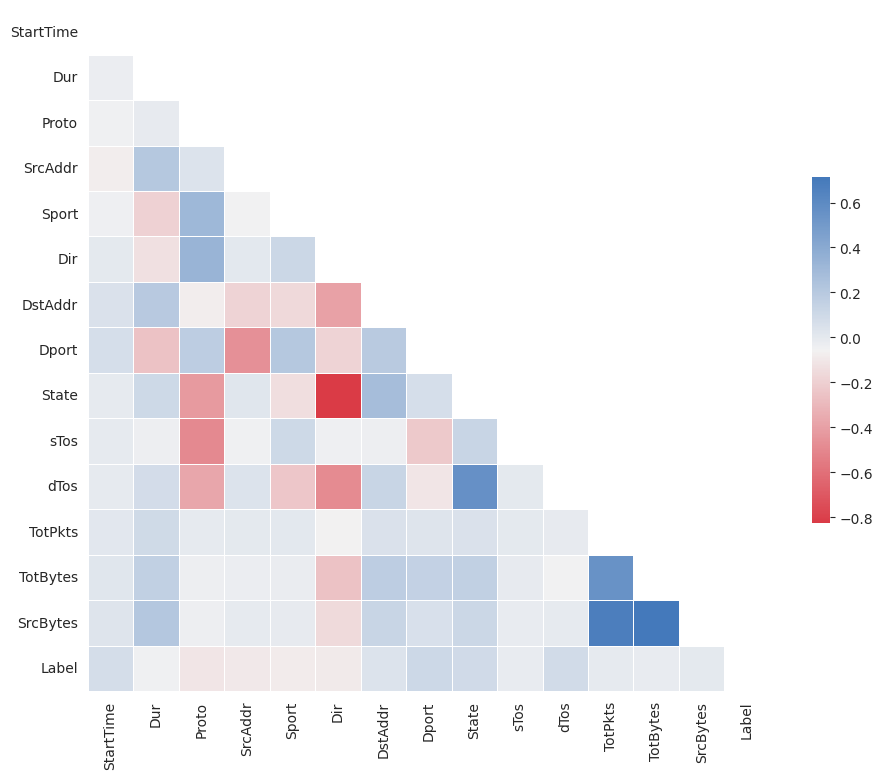

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)